# Mini-Challenge 1

Modul: Deep Learning  
Thema: Hyperparameter und Model Tuning  
Student: Si Ben Tran  
Fachexperte: Martin Melchior  
Abgabetermin: Ende FS23   

Ziel:  
Implementiere, trainiere und validiere ein Neuronales Netzwerk Modell für einen
Klassifikationstask mit geeignetem Dataset. Der zu modellierende Task und die dazu
passenden Daten sollen am Anfang der Mini-Challenge individuell vereinbart werden. Dabei
können die Studierenden auch ihre Wünsche einbringen und Task/Datensatz vorschlagen.
Dabei ist aber darauf zu achten, dass der Fokus auf das Training und die Evaluation gelegt
und nicht zu viel Zeit mit Datenbeschaffung, -Analyse und -Vorverarbeitung verbraucht wird.
Der Datensatz sollte auch nicht zu gross sein, um viele verschiedene Modell- und
Parametervarianten evaluieren zu können. Ausserdem sollten nicht zu ausgeklügelte
komplexe Modell-Architekturen untersucht werden. Ein MLP für die Klassifikation allenfalls
mit ein paar CNN-Layern für Feature-Extraktion sollte ausreichen.

Zeitlicher Rahmen:  
Wird beim Schritt 1 verbindlich festgelegt.

Beurteilung:  
Beurteilt wird auf Basis des abgegebenen Notebooks:  
• Vollständige und korrekte Umsetzung der vereinbarten Aufgabestellung.  
• Klare, gut-strukturierte Umsetzung.  
• Schlüssige Beschreibung und Interpretation der Ergebnisse. Gut gewählte und gut kommentierten Plots und Tabellen.  
• Vernünftiger Umgang mit (Computing-)Ressourcen.  
• Verständliche Präsentation der Ergebnisse.  


---

# Arbeitsschritte

## Schritt 1: Auswahl Task / Datensatz  

**Absprache/Beschluss** mit Fachcoach über Daten/Task.

**1. Mache Dir Gedanken, mit welchen Daten Du arbeiten möchtest und welcher Task
gelernt werden soll.**  

Gedanken: Ich moechte gerne ein CNN-Modell zur Klassifizierung des CIFAR-10-Datensatzes zu trainieren, um ein besseres Verständnis von CNNs zu erlangen und die Hyperparameter mithilfe von Weights & Biases-Integration zu optimieren.

**2. Diskutiere die Idee mit dem Fachcoach.**  

Diskussion: Es wurde mal vorerst vereinbart, am 16.04.23 die Minichallenge 1 abzugeben und die Aufgaben zu erledigen. 


---

## Schritt 2: Daten Kennenlernen
Wie erwähnt, sollte dieser Schritt nicht viel Zeit beanspruchen, da der Datensatz einfach
sein soll!


**1. Mache Dich mit dem Datensatz vertraut, indem Du eine (kurze) explorative Analyse
der Features durchführst: z.B. Vergleich der Klassen pro Feature, Balanciertheit der
Klassen.**


In [1]:
# Libraries Laden

## PyTorch Libraries
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn 
import torch.nn.functional as F

import torch.optim as optim

## Data Science Libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Wandb Libraries
import wandb

# Device Einstellungen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('torch cuda is available:', torch.cuda.is_available())
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
else:
    print('No GPU available, using the CPU instead.')

torch cuda is available: False
Using device: cpu
No GPU available, using the CPU instead.


In [2]:
# Laden der CIFAR-10 Daten
cifar_trainset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=None)
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Dimension vom Datensatz
print("Trainingsset: Anzahl Bilder {}, Hoehe {}, Breite {}, Farbkanäle {}".format(cifar_trainset.data.shape[0], cifar_trainset.data.shape[1], cifar_trainset.data.shape[2], cifar_trainset.data.shape[3]))
print("Testset: Anzahl Bilder {} , Hoehe {}, Breite {}, Farbkanäle {}".format(cifar_testset.data.shape[0], cifar_testset.data.shape[1], cifar_testset.data.shape[2], cifar_testset.data.shape[3]))

Trainingsset: Anzahl Bilder 50000, Hoehe 32, Breite 32, Farbkanäle 3
Testset: Anzahl Bilder 10000 , Hoehe 32, Breite 32, Farbkanäle 3


In [4]:
# Labels und Targets 
print("Alle vorhandenen Labels Trainset: ", cifar_trainset.classes)
print("Alle vorhandenen Targets Trainset: ", cifar_trainset.targets)

# testdatensatz
print("Alle vorhandenen Labels Trainset: ", cifar_testset.classes)
print("Alle vorhandenen Targets Testset: ", cifar_testset.targets)

Alle vorhandenen Labels Trainset:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Alle vorhandenen Targets Trainset:  [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 

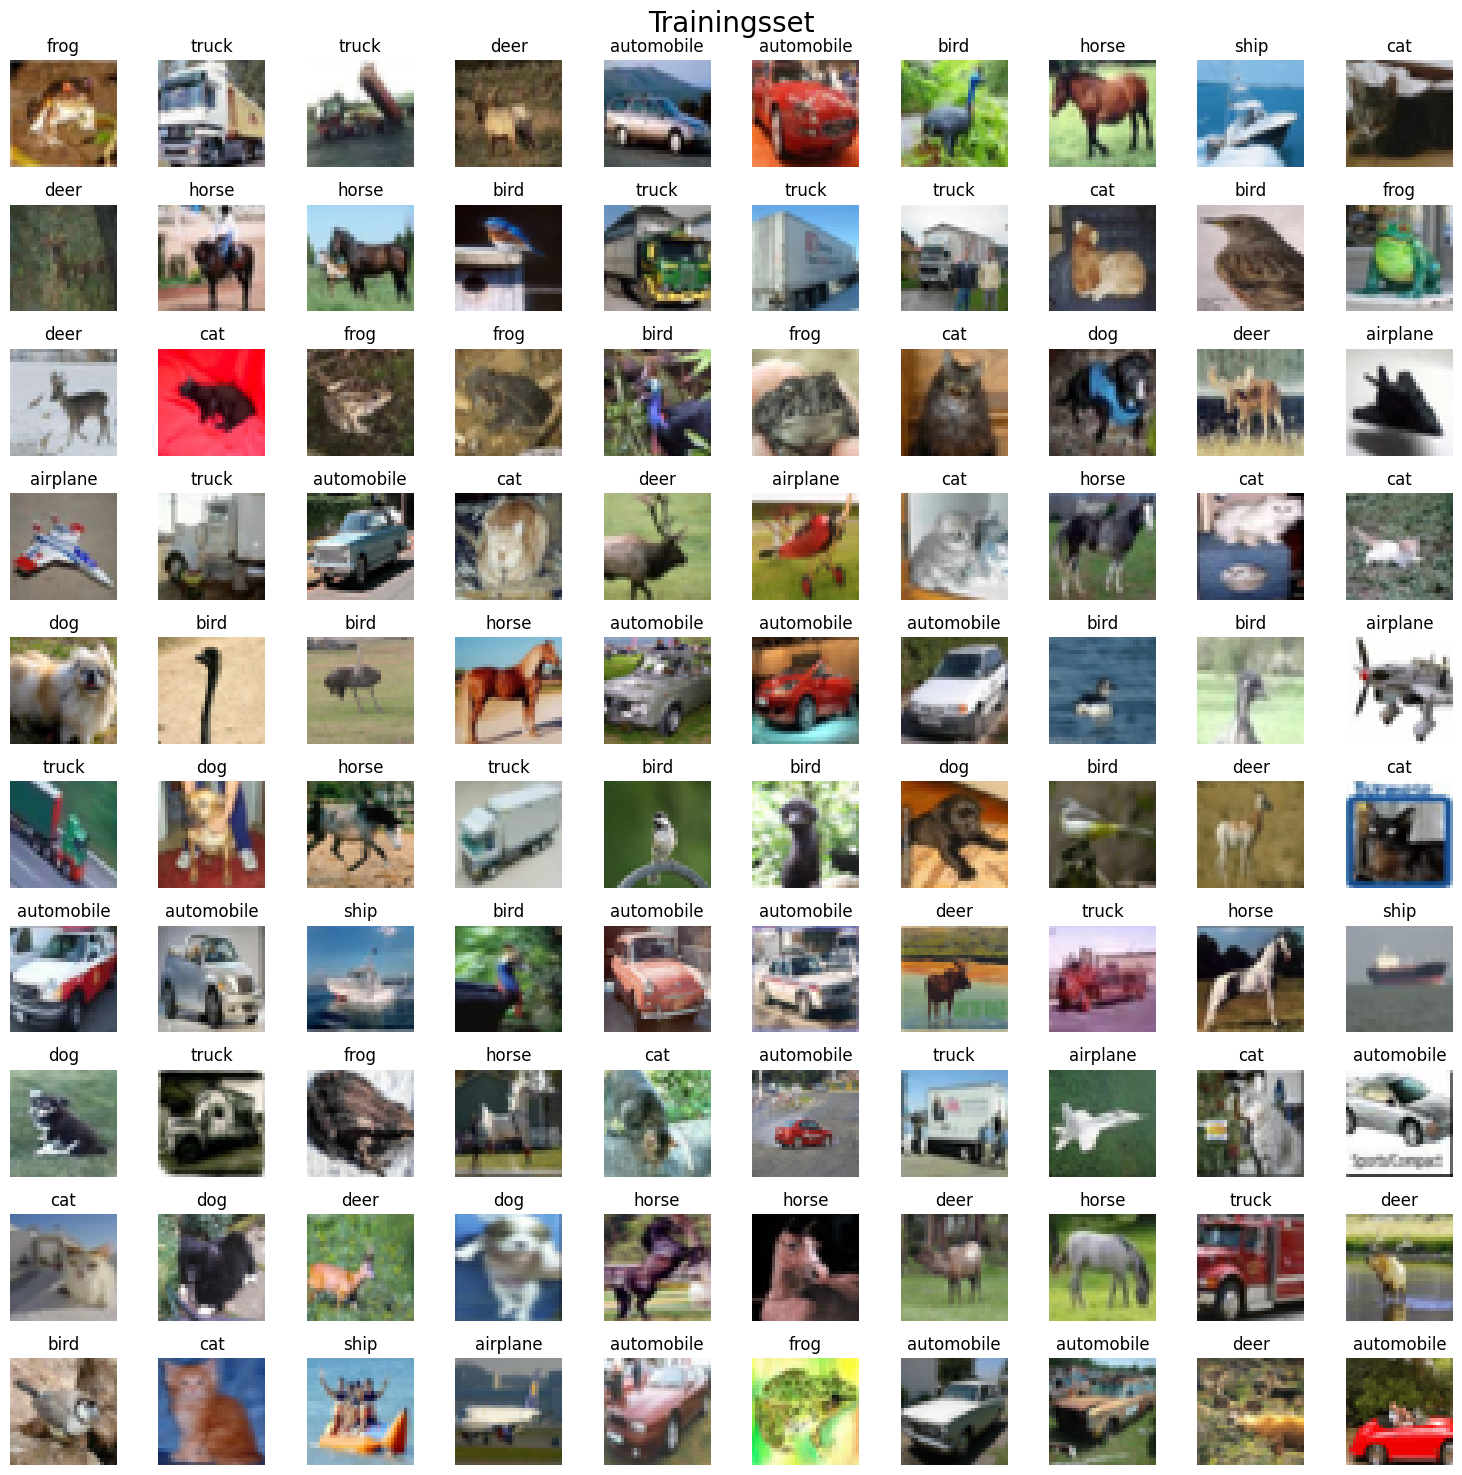

In [5]:
# plot trainingsset 10x10 grid
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(cifar_trainset.data[i*10+j])
        ax[i, j].set_title(cifar_trainset.classes[cifar_trainset.targets[i*10+j]])
        ax[i, j].axis('off')
        ax[i, j].grid(False)
plt.suptitle('Trainingsset', fontsize=20)
plt.tight_layout()
plt.show()

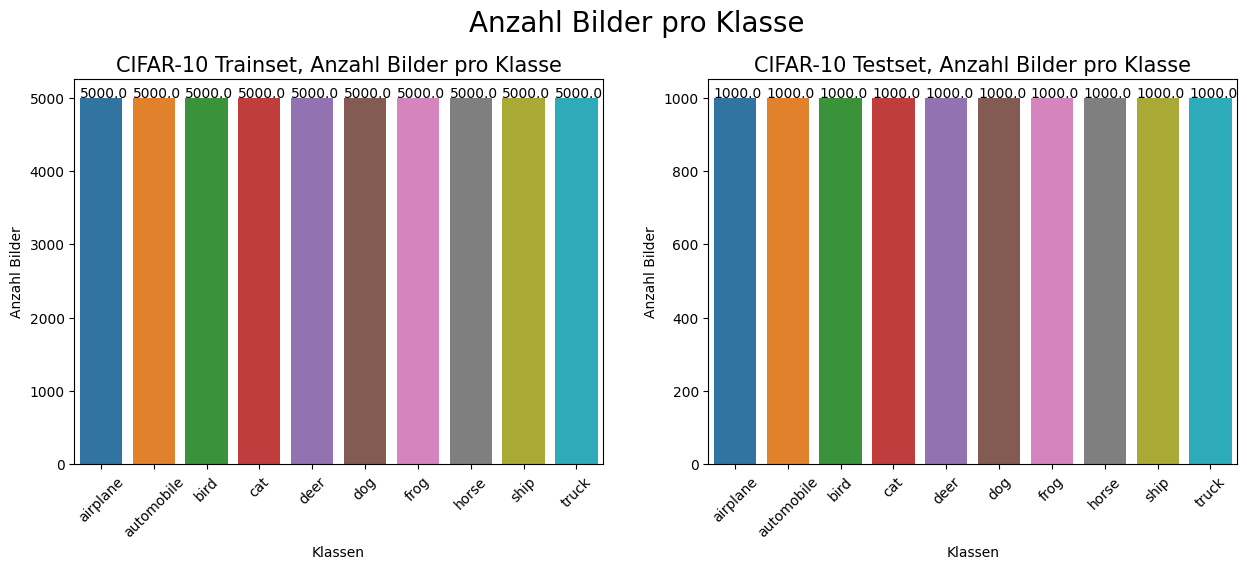

In [6]:
# Visualisierung Anzahl Bilder Pro Klasse  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=cifar_trainset.classes, y=np.bincount(cifar_trainset.targets), ax=ax1)
sns.barplot(x=cifar_testset.classes, y=np.bincount(cifar_testset.targets), ax=ax2)
ax1.set_title("CIFAR-10 Trainset, Anzahl Bilder pro Klasse", fontsize=15)
ax2.set_title("CIFAR-10 Testset, Anzahl Bilder pro Klasse", fontsize=15)
ax1.set_ylabel("Anzahl Bilder", fontsize=10)
ax1.set_xlabel("Klassen", fontsize=10)
ax2.set_ylabel("Anzahl Bilder", fontsize=10)
ax2.set_xlabel("Klassen", fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
fig.suptitle("Anzahl Bilder pro Klasse", fontsize=20, y = 1.02)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()


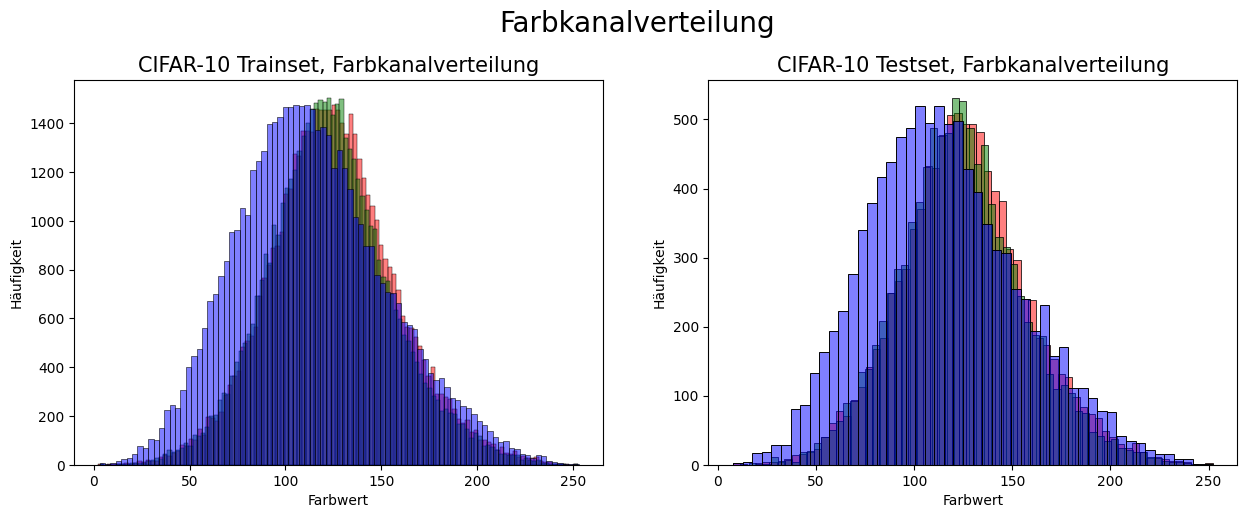

In [7]:
# get the distribution of the colour channels
def get_channel_distribution(data):
    r = []
    g = []
    b = []
    for i in range(data.shape[0]):
        r.append(np.mean(data[i, :, :, 0]))
        g.append(np.mean(data[i, :, :, 1]))
        b.append(np.mean(data[i, :, :, 2]))
    return r, g, b

# get the distribution of the colour channels
r_train, g_train, b_train = get_channel_distribution(cifar_trainset.data)
r_test, g_test, b_test = get_channel_distribution(cifar_testset.data)

# plot the distribution of the colour channels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(r_train, ax=ax1, color='r', alpha = 0.5)
sns.histplot(g_train, ax=ax1, color='g', alpha = 0.5)
sns.histplot(b_train, ax=ax1, color='b', alpha = 0.5)
sns.histplot(r_test, ax=ax2, color='r', alpha = 0.5)
sns.histplot(g_test, ax=ax2, color='g', alpha = 0.5)
sns.histplot(b_test, ax=ax2, color='b', alpha = 0.5)
ax1.set_title("CIFAR-10 Trainset, Farbkanalverteilung", fontsize=15)
ax2.set_title("CIFAR-10 Testset, Farbkanalverteilung", fontsize=15)
ax1.set_ylabel("Häufigkeit", fontsize=10)
ax1.set_xlabel("Farbwert", fontsize=10)
ax2.set_ylabel("Häufigkeit", fontsize=10)
ax2.set_xlabel("Farbwert", fontsize=10)
fig.suptitle("Farbkanalverteilung", fontsize=20, y = 1.02)
plt.show()


**2. Führe ein geeignetes Preprocessing durch, z.B. Normalisierung der Daten.**

In [8]:
# CODE

# transforms.Compose mehrere Transformationen auf einmal anwenden
# transforms.ToTensor() wandelt die Bilder in Tensoren um
# transoform.Normalize() normalisiert die Farbkanale (R, G, B) der Bilder . Jeder Kanal hat einen Mittelwert von 0.5 und eine Standardabweichung von 0.5

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# batch_size definiert die Anzahl Bilder die gleichzeitig verarbeitet werden sollen

batch_size = 4

# laden von CIFAR-10 Datensatz und die vorhin definierten Transformationenen anwenden, speichern in ./data
cifar_trainset.transform = transform

# trainloader teilt den Datensatz in batch_size auf und mischt die Daten, num_workers ist die Anzahl an Prozessen

cifar_trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# analog fuer den Testdatensatz

cifar_testset.transform = transform

cifer_testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Klassen definieren
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

---

## Schritt 3: Aufbau Modellierung

**Absprache/Beschluss** mit Fachcoach über die zu untersuchenden Varianten (Schritte 4)

**1. Lege fest, wie (mit welchen Metriken) Du Modelle evaluieren möchtest.
Berücksichtige auch den Fehler in der Schätzung dieser Metriken.**

Als Evaluierungsmetrik verwenden wir die Accuracy, da es sich um ein Klassifikationsproblem handelt und die Verteilungen der Klassen ueber den ganzen Datensatz hinweg gleichmaessig verteilt sind, sowohl im Trainingsdatensatz als auch im Testdatensatz.

Wir erstellen verschiedene Modelle und Untersuchung dann das beste Modell.  
Als Benchmark dient hier ein Multi-Layer Perceptron (MLP) mit X Hidden Layers und der Aktivierungsfunktion ReLU.


In [21]:
# Create MLP Modell
class MLP_1(nn.Module):
    'Multilayer Perceptron with 3 Layers'
    # defining the network architecture
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    # defining the forward pass
    def forward(self, x):
        # flatten the input
        x = x.view(-1, 3*32*32)
        # pass input through the first layer
        x = self.fc1(x)
        # apply activation function
        x = F.relu(x)
        # pass input through the second layer
        x = self.fc2(x)
        # apply activation function
        x = F.relu(x)
        # pass input through the third layer
        x = self.fc3(x)
        # return output
        return x

In [22]:
# Create first Convolutional Neural Network class
class CNN_1(nn.Module):
    'Connective Neural Network with 2 Convolutional Layers and 3 Fully Connected Layers'
    # defining the network architecture
    def __init__(self):
        super().__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        # 6 input image channel, 16 output channels, 5x5 square convolution
        self.conv2 = nn.Conv2d(6, 16, 5)
        # fully connected layer, 16*5*5 inputs, 120 outputs
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # fully connected layer, 120 inputs, 84 outputs
        self.fc2 = nn.Linear(120, 84)
        # 84 inputs, 10 outputs for our 10 defined classes
        self.fc3 = nn.Linear(84, 10)

    # define the forward pass
    def forward(self, x):
        # pass input value x through first convolutional layer
        x = self.conv1(x) 
        # pass output of first convolutional layer through ReLU activation function
        x = F.relu(x)
        # pass output of ReLU activation function through max pooling layer
        x = self.pool(x)
        # pass output of max pooling layer through second convolutional layer
        x = self.conv2(x)
        # pass output of second convolutional layer through ReLU activation function
        x = F.relu(x)
        # pass output of ReLU activation function through max pooling layer
        x = self.pool(x)
        # flatten the output of the max pooling layer
        x = x.view(-1, 16 * 5 * 5)
        # pass flattened output through first fully connected layer
        x = self.fc1(x)
        # pass output of first fully connected layer through ReLU activation function
        x = F.relu(x)
        # pass output of ReLU activation function through second fully connected layer
        x = self.fc2(x)
        # pass output of second fully connected layer through ReLU activation function
        x = F.relu(x)
        # pass output of ReLU activation function through third fully connected layer
        x = self.fc3(x)
        # return output of third fully connected layer
        return x


In [23]:
# creating models
model = CNN_1()
model_mlp_3 = MLP_1()
model_CNN_2_3 = CNN_1()


In [12]:
# Define Loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [13]:
# Train the network

for epoch in range(2): # loop over the dataset multiple times
    # 
    running_loss = 0.0
    for i, data in enumerate(cifar_trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = model(inputs)
        # calculate the loss
        loss = criterion(outputs, labels)
        # calculate backward
        loss.backward()
        # update weights
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print("Finished Training")

[1,  2000] loss: 2.196
[1,  4000] loss: 1.844
[1,  6000] loss: 1.692
[1,  8000] loss: 1.620
[1, 10000] loss: 1.549
[1, 12000] loss: 1.484
[2,  2000] loss: 1.423
[2,  4000] loss: 1.380
[2,  6000] loss: 1.373
[2,  8000] loss: 1.324
[2, 10000] loss: 1.326
[2, 12000] loss: 1.284
Finished Training


In [14]:
# calculate the accuracy
correct = 0
total = 0

with torch.no_grad():
    for data in cifer_testloader:
        images, labels = data
        # calculate the outputs
        outputs = model(images)
        # class with the highest probability is our predicted class
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 54.23 %


In [15]:
# preapare to count prediction for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in cifer_testloader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class {classname:5s} is: {accuracy:2.1f} %')
            

Accuracy for class plane is: 58.6 %
Accuracy for class car   is: 62.3 %
Accuracy for class bird  is: 40.6 %
Accuracy for class cat   is: 31.9 %
Accuracy for class deer  is: 39.0 %
Accuracy for class dog   is: 36.4 %
Accuracy for class frog  is: 79.7 %
Accuracy for class horse is: 51.5 %
Accuracy for class ship  is: 67.6 %
Accuracy for class truck is: 74.7 %


**2. Implementiere Basisfunktionalität, um Modelle zu trainieren und gegeneinander zu
evaluieren.**

Empfehlenswert ist die Verwendung einer geeigneten MLOps Plattform (z.B. [W&B](https://wandb.ai/site))

In [ ]:
# CODE

**3. Teste Modelle und Trainingsfunktionalität, indem Du nur mit einem einzigen Sample
oder einem Batch trainierst. Damit bekommst Du zwar Overfitting, aber auch einen
guten Test, der zeigt dass Information aus den Daten aufgenommen werden kann.**

In [ ]:
# CODE

---

## Schritt 4: Evaluation

Bei der Evaluation ist darauf zu achten, dass das Vorgehen stets möglichst reflektiert
erfolgt und versucht wird, die Ergebnisse zu interpretieren. Am Schluss soll auch ein
Fazit gezogen werden, darüber welche Variante am besten funktioniert.

### 1. Training mit SGD, ohne REG, ohne BN:  
Untersuche verschiedene Modelle unterschiedlicher Komplexität, welche geeignet
sein könnten, um das Klassifikationsproblem zu lösen. Verwende Stochastic Gradient
Descent - ohne Beschleunigung, ohne Regularisierung (REG) und ohne Batchnorm
(BN). Überlege Dir für jeden Fall, wie die Gewichte initialisiert werden sollen.

In [ ]:
# CODE

**a. Für jedes Modell mit gegebener Anzahl Layer und Units pro Layer führe ein
sorgfältiges Hyper-Parameter-Tuning durch (Lernrate, Batch-Grösse). Achte
stets darauf, dass das Training stabil läuft. Merke Dir bei jedem Training, den
Loss, die Performance Metrik(en) inkl. Schätzfehler, die verwendete Anzahl
Epochen, Lernrate und Batch-Grösse.**

In [ ]:
# CODE

**b. Variiere die Anzahl Layer und Anzahl Units pro Layer, um eine möglichst gute
Performance zu erreichen. Falls auch CNNs (ohne Transfer-Learning)
verwendet werden variiere auch Anzahl Filter, Kernel-Grösse, Stride, Padding.**

In [ ]:
# CODE

**c. Fasse die Ergebnisse zusammen in einem geeigneten Plot, bilde eine
Synthese und folgere, welche Modell-Komplexität Dir am sinnvollsten
erscheint.**

In [ ]:
# CODE

---

### 2. Nutzen der Regularisierung

Ziehe nun verschiedene Regularisierungsmethoden bei den MLP Layern in Betracht:

**a. L1/L2 Weight Penalty**

In [ ]:
# CODE

**b. Dropout**

In [ ]:
# CODE

Evaluiere den Nutzen der Regularisierung, auch unter Berücksichtigung
verschiedener Regularisierungsstärken.
Beschreibe auch kurz, was allgemein das Ziel von Regularisierungsmethoden ist
(Regularisierung im Allgemeinen, sowie auch Idee der einzelnen Methoden).
Inwiefern wird dieses Ziel im gegebenen Fall erreicht?

In [ ]:
# CODE

---

### 3. Nutzen von Batchnorm BN (ohne REG, mit SGD)

Evaluiere, ob Batchnorm etwas bringt. Beschreibe kurz, was die Idee von BN ist,
wozu es helfen soll.

In [ ]:
# CODE

---

### 4. Nutzen von Adam (ohne BN, ohne / mit REG)

Evaluiere, ob Du mit Adam bessere Resultate erzielen kannst.

In [ ]:
# CODE

---

## Schritt 5: Präsentation, Bericht

1. Präsentation (~10m): Kurze Präsentation mit Diskussion der wichtigsten Ergebnisse.
Q&A (~10min): Klärung von Verständnisfragen zu Stochastic Gradient Descent,
Parameter Tuning, Regularisierung, Batchnorm und Optimizers.

2. Bericht in Form eines (!) gut dokumentierten, übersichtlichen Jupyter Notebooks.
Dieses soll schliesslich auch abgegeben werden und dem Fachexperten erlauben, die
Schritte nachzuvollziehen (allenfalls auch das Training erneut laufen zu lassen).

---